In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading the csv file
df_population_raw = pd.read_csv('population_total.csv')

In [3]:
# first look at the dataset
df_population_raw.head()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09


In [84]:
# sort by population descending
df_population_raw.sort_values(by='population', ascending=False)

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
1243,Micronesia,NaN,NaN
1244,Micronesia,NaN,NaN
1245,Micronesia,NaN,NaN
1310,Micronesia,NaN,NaN


# Encontrando los países con mayor población


In [43]:
top_pop = df_population_raw.groupby(['country']).max()
top_pop.head()

,year,population
country,,
Afghanistan,2020.0,38928346.0
Albania,2020.0,3286073.0
Algeria,2020.0,43851044.0
American Samoa,2019.0,59562.0
Andorra,2019.0,84449.0


In [47]:
top_10 = top_pop.sort_values(by='population', ascending=False)
top_10.head()


,year,population
country,,
China,2020.0,1.439324e+09
India,2020.0,1.380004e+09
United States,2020.0,3.310027e+08
Indonesia,2020.0,2.735236e+08
Pakistan,2020.0,2.208923e+08


# Making a Pivot Table

.pivot(): Returns reshaped DataFrame organized by given index / column values ("pivot without aggregation")

In [45]:
# dropping null values
df_population_raw.dropna(inplace=True)

In [46]:
# making a pivot table
df_pivot = df_population_raw.pivot(index='year', columns='country',
                                        values='population')

df_pivot.head()

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1955.0,8270991.0,1419994.0,9774283.0,19754.0,9232.0,5043247.0,5783.0,49648.0,18789418.0,1563507.0,...,2372559.0,7277333.0,54921.0,6744695.0,28147443.0,7669.0,21147.0,4965574.0,2644976.0,3213286.0
1960.0,8996973.0,1636090.0,11057863.0,20123.0,13411.0,5454933.0,6032.0,54131.0,20481779.0,1874121.0,...,2538643.0,8526300.0,63689.0,8141841.0,32670039.0,8157.0,32761.0,5315355.0,3070776.0,3776681.0
1965.0,9956320.0,1896171.0,12550885.0,23672.0,18549.0,5770570.0,6361.0,58698.0,22159650.0,2211319.0,...,2694536.0,10116870.0,74270.0,9692278.0,37858951.0,8724.0,50970.0,5727751.0,3570464.0,4471177.0
1970.0,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,...,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,6193384.0,4179067.0,5289303.0
1975.0,12689160.0,2411732.0,16607707.0,30052.0,30705.0,7024000.0,7159.0,62675.0,25865776.0,2832759.0,...,2830176.0,13857478.0,99859.0,13189509.0,48718189.0,9320.0,74954.0,6784695.0,4943283.0,6293875.0


In [48]:
# selecting some countries
df_pivot = df_pivot[['United States', 'India', 'China', 'Indonesia', 'Pakistan']]

In [49]:
# showing pivot table and sort by year descending
df_pivot.sort_values(by='year', ascending=False)

country,United States,India,China,Indonesia,Pakistan
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,220892340.0
2019.0,329064917.0,1.366418e+09,1.433784e+09,270625568.0,216565318.0
2018.0,327096265.0,1.352642e+09,1.427648e+09,267670543.0,212228286.0
2017.0,325084756.0,1.338677e+09,1.421022e+09,264650963.0,207906209.0
2016.0,323015995.0,1.324517e+09,1.414049e+09,261556381.0,203631353.0
2015.0,320878310.0,1.310152e+09,1.406848e+09,258383256.0,199426964.0
2010.0,309011475.0,1.234281e+09,1.368811e+09,241834215.0,179424641.0
2005.0,294993511.0,1.147610e+09,1.330776e+09,226289470.0,160304008.0
2000.0,281710909.0,1.056576e+09,1.290551e+09,211513823.0,142343578.0


In [50]:
# importing matplotlib
import matplotlib.pyplot as plt

# Lineplot

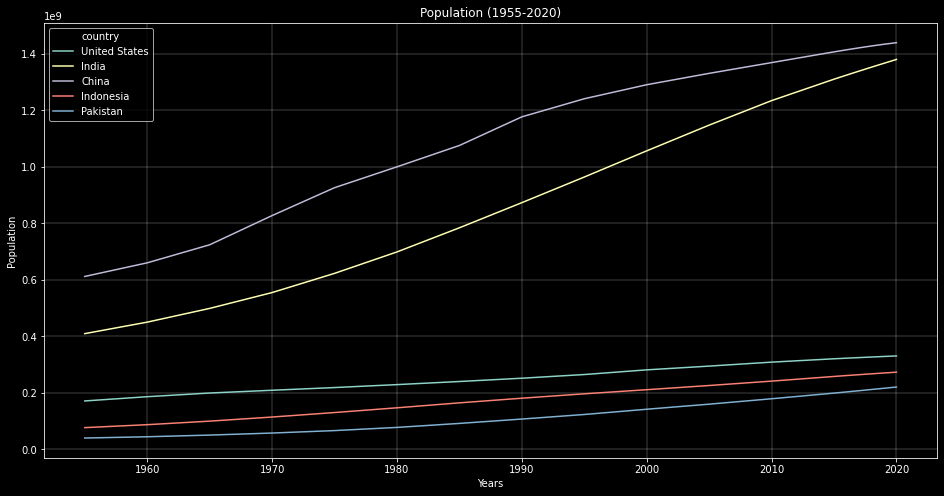

In [52]:
df_pivot.plot(kind='line',
            xlabel='Years', ylabel='Population',
            title='Population (1955-2020)',
            figsize=(16,8))

plt.grid(lw = 0.25)
plt.style.use('dark_background')
# save plot
plt.savefig('my_test.png')
# show plot
plt.show()

In [54]:
df_pivot.index

Float64Index([1955.0, 1960.0, 1965.0, 1970.0, 1975.0, 1980.0, 1985.0, 1990.0,
              1995.0, 2000.0, 2005.0, 2010.0, 2015.0, 2016.0, 2017.0, 2018.0,
              2019.0, 2020.0],
             dtype='float64', name='year')

In [55]:
# selectiing only the year (2020)
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])] 
df_pivot_2020


country,United States,India,China,Indonesia,Pakistan
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,220892340.0


In [57]:
# transpose dataframe from rows to columns or viceversa
df_pivot_2020 = df_pivot_2020.T
df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Pakistan,2.208923e+08


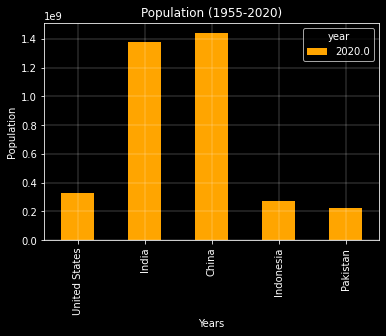

In [59]:
df_pivot_2020.plot(kind='bar', color='orange',  xlabel='Years', ylabel='Population', title='Population (1955-2020)')
plt.grid(lw=0.25)

## Barplot grouped by 'n' variables

In [60]:
# selecting a few years
df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010, 2020])]
df_pivot_sample

country,United States,India,China,Indonesia,Pakistan
year,,,,,
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,78054343.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,107647921.0
2000.0,281710909.0,1.056576e+09,1.290551e+09,211513823.0,142343578.0
2010.0,309011475.0,1.234281e+09,1.368811e+09,241834215.0,179424641.0
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,220892340.0


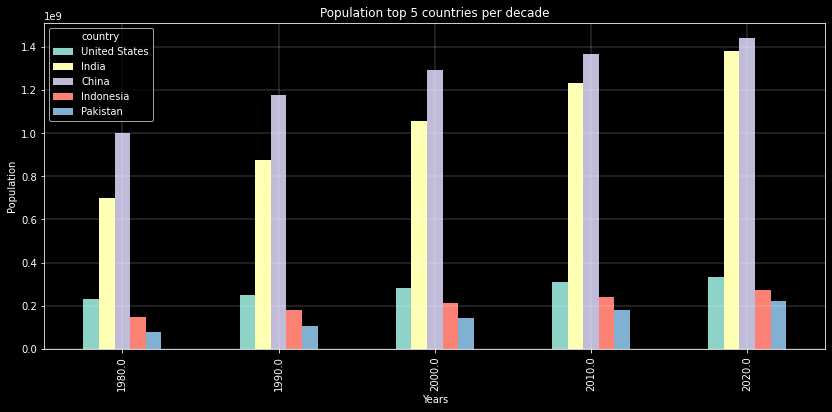

In [65]:
# making grouped barplot
df_pivot_sample.plot(kind='bar', xlabel='Years', ylabel='Population', title='Population top 5 countries per decade', figsize=(14, 6))
plt.grid(lw=0.25)


## PieChart

In [67]:
df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Pakistan,2.208923e+08


In [68]:
# changing column name
df_pivot_2020.rename(columns={2020: '2020'}, inplace=True)

In [69]:
df_pivot_2020

year,2020
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Pakistan,2.208923e+08


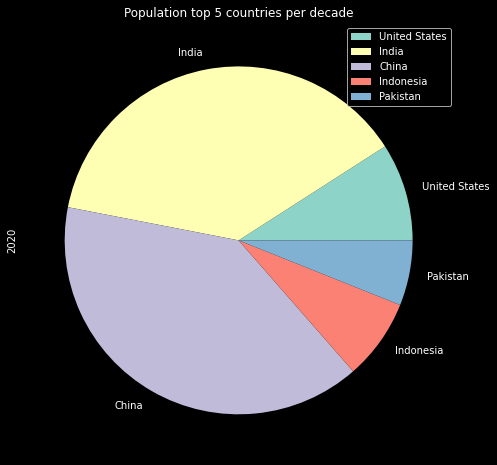

In [74]:
# making the plot
df_pivot_2020.plot(kind='pie',
                y='2020',
                ylabel='2020',
                title='Population top 5 countries per decade',
                figsize=(14, 8))

# save plot
plt.savefig('my_pie_chart.png')
plt.show()

# Export to Excel

In [75]:
df_pivot.to_excel('my_pivot_table.xlsx')